# 10 Boxes analysis.

In [1]:
from module_files_plots import *

We need to provide the following files to the theory object:

In [5]:
theory_path=Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000')
bias_filename=Path('/global/u2/c/cramirez/Codes/CoLoRe/CoLoRe_LyA_v3/examples/LSST/BzBlue.txt')
nz_filename=Path('/global/u2/c/cramirez/Codes/CoLoRe/CoLoRe_LyA_v3/examples/LSST/NzBlue.txt')
pk_filename=Path('/global/u2/c/cramirez/Codes/CoLoRe/CoLoRe_LyA_v3/examples/simple/Pk_CAMB_test.dat')

Create theory object:

In [4]:
theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=1,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg',
    bias_filename=bias_filename,
    apply_lognormal=True)

Read boxes output. We will use the analysis of the 10 boxes here:

In [18]:
boxes_path=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/binned_analysis_with_error')

boxes = FileFuncs.mix_sims(
    FileFuncs.get_full_path(boxes_path,
                            rsd=True,
                            rmin=0.1, rmax=200, N_bins=41,
                            zmin=0.5, zmax=0.7, #Also results for 0.7 and 0.9
                            nside=2)
)

We should have 480 boxes for analysis, that is 48 pixels for each of the 10 CoLoRe boxes.

In [11]:
len(boxes)

480

We can easily make plots using Plots.plot_data, Plots.plot_theory. These methods are defined in module_files_plots.Plots

In [14]:
z = theory.get_zeff(zmin=0.5, zmax=0.7)

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
Getting growth factor from CoLoRe files failed, computing it...


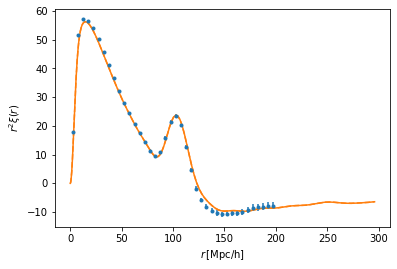

In [17]:
fig, ax = plt.subplots()
pole=0

Plots.plot_data(pole=pole, boxes=boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_theory(pole=pole, theory=theory, z=z, bias=1.3, rsd=True, ax=ax, plot_args=dict(c='C1', label='model'))

# Fitter

To perform a fit, we use the class Fitter from module_files_plots:

In [22]:
fitter = Fitter(boxes=boxes, z=z, theory=theory, poles=[0,2], rsd=True, bias0=1.3,
    smooth_factor0=1, smooth_factor_rsd0=1, smooth_factor_cross0=1)

fitter.run_fit(free_params=['bias'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
Getting growth factor from CoLoRe files failed, computing it...
Getting growth factor from CoLoRe files failed, computing it...
Getting growth factor from CoLoRe files failed, computing it...
Getting growth factor from CoLoRe files failed, computing it...
Getting growth factor from CoLoRe files failed, computing it...
Getting growth factor from CoLoRe files failed, computing it...
Gettin

In [25]:
print(fitter.pars_tab())

| name                |   value |   stderr |   stderror(%) |   init value |   min |   max | vary   |
|---------------------|---------|----------|---------------|--------------|-------|-------|--------|
| bias                |   1.316 |    0.001 |         0.069 |          1.3 |     0 |   inf | True   |
| smooth_factor       |   1     |    0     |         0     |          1   |     0 |   inf | False  |
| smooth_factor_rsd   |   1     |    0     |         0     |          1   |     0 |   inf | False  |
| smooth_factor_cross |   1     |    0     |         0     |          1   |     0 |   inf | False  |


If more than one parameter is free, we can get the correlation between these values by using.

In [28]:
print(fitter.corrs_tab())

| name   | name   | corr   |
|--------|--------|--------|
